### __Problem (I):__ Random Walk (Derivation) 1D:

We model the photon's motion as a 1D symmetric random walk with step size $\lambda $, where at each step, the photon moves left or right with equal probability. We aim to determine the number of steps $N_{\text{out}} $required to reach a distance $d $from the origin.

### Step 1: Expectation Value of Position
Since each step is equally likely to be in either direction, the expectation value of position at any step $n $is:
$$
<x_n> = 0
$$
which follows from symmetry.

### Step 2: Expectation of $x^2 $(Variance)
We use induction to show that:
$$
<x_n^2> = n \lambda^2.
$$

#### Base Case ($n = 1 $):
After the first step, the photon is at $x = \pm \lambda $, so:
$$
<x_1^2> = \frac{1}{2}(\lambda^2 + \lambda^2) = \lambda^2.
$$

#### Inductive Step:
Assume that for some $n $,
$$
<x_n^2> = n \lambda^2.
$$
For step $n+1 $, the photon moves to either $x_n + \lambda $or $x_n - \lambda $with equal probability. Using the expectation formula:
$$
<x_{n+1}^2> = \frac{1}{2} ((x_n + \lambda)^2 + (x_n - \lambda)^2).
$$
Expanding the squares:
$$
(x_n + \lambda)^2 = x_n^2 + 2\lambda x_n + \lambda^2, \quad (x_n - \lambda)^2 = x_n^2 - 2\lambda x_n + \lambda^2.
$$
Taking expectation:
$$
<x_{n+1}^2> = \frac{1}{2} \left( x_n^2 + 2\lambda x_n + \lambda^2 + x_n^2 - 2\lambda x_n + \lambda^2 \right).
$$
Since $<x_n> = 0 $, the cross terms vanish:
$$
<x_{n+1}^2> = \frac{1}{2} \left( 2x_n^2 + 2\lambda^2 \right) = x_n^2 + \lambda^2.
$$
Using the induction hypothesis:
$$
<x_{n+1}^2> = n\lambda^2 + \lambda^2 = (n+1) \lambda^2.
$$
Thus, by induction:
$$
<x_n^2> = n \lambda^2.
$$

### Step 3: Solving for $N_{\text{out}} $
The photon reaches the boundary at distance $d $, meaning the expected squared displacement equals $d^2 $:
$$
<x_{N_{\text{out}}}^2> = d^2.
$$
Using our result:
$$
N_{\text{out}} \lambda^2 = d^2.
$$
Solving for $N_{\text{out}} $:
$$
N_{\text{out}} = \frac{d^2}{\lambda^2}.
$$

### __Problem (II):__ Numerical Implementation of a Random Walk in 3D:

We aim to determine the number of scattering steps $ N_{\text{out}} $ required for a photon to travel a distance $ d $ via a 3D random walk with step size $ \lambda $.

### Step 1: Expectation Value of Squared Displacement
Since the motion is isotropic, we consider the expectation value of the squared displacement in 3D. For a random walk in three dimensions, the mean squared displacement follows:
$$
<r^2> = N \lambda^2.
$$
This can be derived similarly to the 1D case but now incorporating the three independent spatial components.

### Step 2: Relationship Between $ N_{\text{out}} $ and $ d $
The photon reaches the sphere when $ r = d $, meaning:
$$
<r^2> = d^2.
$$
Using the result from step 1:
$$
N_{\text{out}} \lambda^2 = d^2.
$$
Solving for $ N_{\text{out}} $:
$$
N_{\text{out}} = \frac{d^2}{\lambda^2}.
$$

### Step 3: Why is the 3D Case the Same as the 1D Case?
In a **1D random walk**, the squared displacement grows as:
$$
<x^2> = N \lambda^2.
$$
In a **3D random walk**, due to the isotropic nature of scattering, the three independent components $ x, y, z $ each contribute equally. Since the mean squared displacement in each direction follows the same pattern, summing over three dimensions leads to:
$$
<r^2>  =  <x^2> + <y^2> + <z^2> = N \lambda^2.
$$
Thus, the final result for $ N_{\text{out}} $ remains the same:
$$
N_{\text{out}} = \frac{d^2}{\lambda^2}.
$$

\textbf{Conclusion:} The dependence of $ N_{\text{out}} $ on $ d $ and $ \lambda $ remains the same in 1D and 3D because the mean squared displacement accumulates linearly with $ N $, regardless of the number of independent spatial dimensions.


In [5]:
import numpy as np

# Constants
d = 1.0  # Sphere radius
Lambda = 1e-3  # Mean free path
Nphotons = 1000  # Number of photons to simulate

np.random.seed(100)  # Seed for reproducibility

In [6]:
def random_walk_3D(return_path=False):
    """Simulates a single photon performing a 3D random walk until it reaches the sphere boundary."""
    x, y, z = 0.0, 0.0, 0.0  # Start at the origin
    steps = 0
    path = [(x, y, z)] if return_path else None  # Store path if needed
    
    while np.sqrt(x**2 + y**2 + z**2) < d:
        # Generate random angles
        sin_theta = 2.0 * np.random.rand() - 1.0  # Uniform in [-1,1]
        theta = np.arcsin(sin_theta)
        phi = 2.0 * np.pi * np.random.rand()  # Uniform in [0, 2π]
        
        # Step displacement
        dx = Lambda * np.sin(theta) * np.cos(phi)
        dy = Lambda * np.sin(theta) * np.sin(phi)
        dz = Lambda * np.cos(theta)
        
        # Update position
        x += dx
        y += dy
        z += dz
        steps += 1

        if return_path:
            path.append((x, y, z))

    return (steps, path) if return_path else steps


In [7]:
# Run the simulation for multiple photons
steps_list = np.array([random_walk_3D() for _ in range(Nphotons)])

# Compute the average number of steps
Nout_avg = np.mean(steps_list)
std_error = np.std(steps_list) / np.sqrt(Nphotons)  # Error decreases as 1/sqrt(Nphotons)

print(f"Average N_out: {Nout_avg:.2f} ± {std_error:.2f}")

Average N_out: 1273.19 ± 0.33


In [8]:
# Checking dependence on d and lambda
d_values = [0.5,1.0, 2.0]
lambda_values = [1e-3, 5e-3, 1e-2]

print("\nDependence on d:")
for d_test in d_values:
    steps_list = np.array([random_walk_3D() for _ in range(Nphotons)])
    print(f"d = {d_test}, N_out ≈ {np.mean(steps_list):.2f}")

print("\nDependence on lambda:")
for lambda_test in lambda_values:
    Lambda = lambda_test  # Update mean free path
    steps_list = np.array([random_walk_3D() for _ in range(Nphotons)])
    print(f"lambda = {lambda_test}, N_out ≈ {np.mean(steps_list):.2f}")


Dependence on d:
d = 0.5, N_out ≈ 1273.30
d = 1.0, N_out ≈ 1273.73
d = 2.0, N_out ≈ 1273.65

Dependence on lambda:
lambda = 0.001, N_out ≈ 1273.79
lambda = 0.005, N_out ≈ 254.96
lambda = 0.01, N_out ≈ 127.51


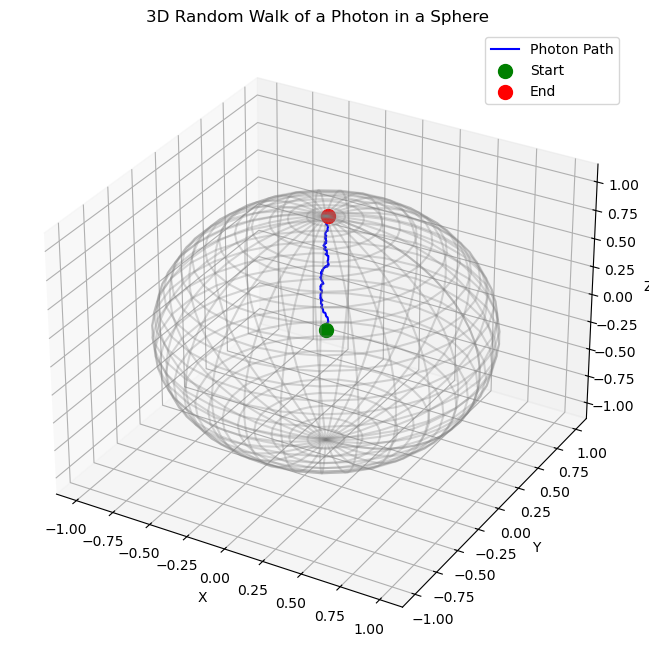

In [9]:
import matplotlib.pyplot as plt
# Visualizing the path of a single photon
_, path = random_walk_3D(return_path=True)
path = np.array(path)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot random walk trajectory
ax.plot(path[:, 0], path[:, 1], path[:, 2], color='b', label="Photon Path")

# Plot starting point
ax.scatter(0, 0, 0, color='g', s=100, label="Start")

# Plot ending point
ax.scatter(path[-1, 0], path[-1, 1], path[-1, 2], color='r', s=100, label="End")

# Plot the boundary sphere
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
x_sphere = d * np.outer(np.cos(u), np.sin(v))
y_sphere = d * np.outer(np.sin(u), np.sin(v))
z_sphere = d * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color="gray", alpha=0.3)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Random Walk of a Photon in a Sphere")
ax.legend()
plt.show()